In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from scipy.optimize import curve_fit

In [3]:
#df = pd.read_csv('C:/Users/CW/Desktop/gravity data.csv')
#print(df.columns)
data = np.loadtxt('grav data.txt')
x = np.array(data[:,0])
y = np.array(data[:,1])
CBA = np.array(data[:,2])
#topo = np.loadtxt('C:/Users/CW/Desktop/7 mizoram/topo.txt')
#xt = np.array(topo[:,0])
#yt = np.array(topo[:,1])
#zt = np.array(topo[:,2])

In [4]:
gg = pd.DataFrame({'Longitude': x, 'Latitude': y,'CBA': CBA})
print(gg.head())
# gg.to_csv('C:/Users/CW/Desktop/7 mizoram/grav data.csv') 

   Longitude  Latitude        CBA
0     92.590     23.63 -42.284879
1     92.591     23.63 -42.375493
2     92.592     23.63 -42.465018
3     92.593     23.63 -42.553436
4     92.594     23.63 -42.640730


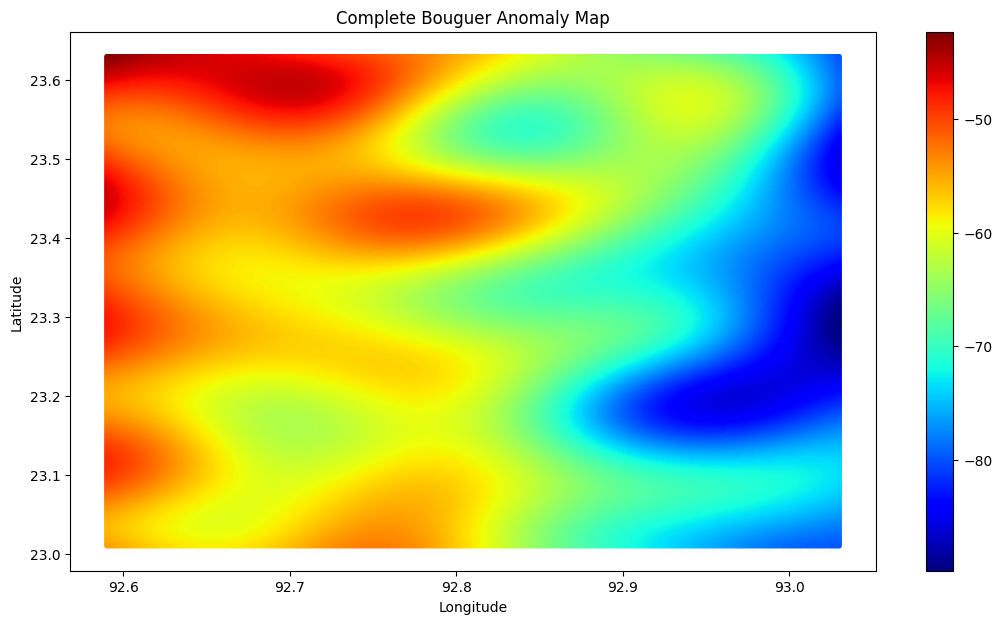

In [5]:
plt.figure(figsize=(13,7))
#plt.subplot(1,2,1)
plt.scatter(x, y, c = CBA, cmap = 'jet', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.title('Complete Bouguer Anomaly Map')

#plt.subplot(1,2,2)
#plt.scatter(xt, yt, c = zt, cmap = 'jet', s=5)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.colorbar()
#plt.title('Topography')
plt.show()

In [6]:
xi = np.linspace(min(x), max(x), 50)
yi = np.linspace(min(y), max(y), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolation
cba = griddata((x,y),CBA,(xi,yi))
     

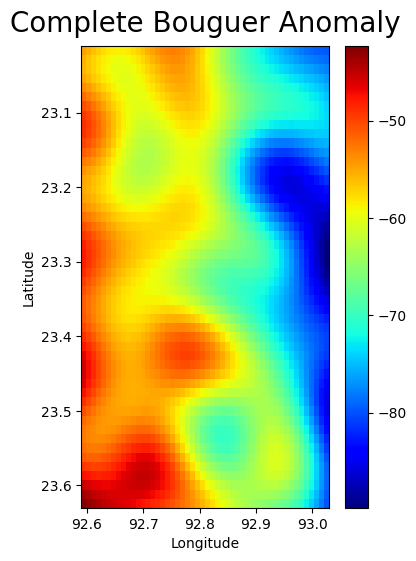

In [7]:
# Min max coordinates
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)

plt.figure(figsize=(4,6))

plt.imshow(cba, aspect='auto', extent=(xmin,xmax,ymax,ymin), cmap='jet')
plt.title("Complete Bouguer Anomaly", size=20, pad=10)
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.colorbar()


plt.show()

In [8]:
def makeSlice(xi, yi, cba, orientation='EW', loc=10):
  if orientation=='EW':
    # E-W slice
    x_slice = xi[loc]
    y_slice = yi[loc]
    g_slice = cba[loc]

  if orientation=='NS':
    x_slice = []
    for k in range(len(xi)):
      xslice = xi[k][loc]
      x_slice.append(float(xslice))
    x_slice = np.array(x_slice)

    y_slice = []
    for k in range(len(xi)):
      yslice = yi[k][k]
      y_slice.append(float(yslice))
    y_slice = np.array(y_slice)

    g_slice = []
    for k in range(len(xi)):
      gslice = cba[k][loc]
      g_slice.append(float(gslice))
    g_slice = np.array(g_slice)
    
  if orientation=='SWNE':
    # SW-NE slice
    x_slice = np.array(xi[0])

    y_slice = []
    for k in range(len(x_slice)):
      yslice = yi[k][k]
      y_slice.append(float(yslice))
    y_slice = np.array(y_slice)

    g_slice = []
    for k in range(len(x_slice)):
      gslice = cba[k][k]
      g_slice.append(float(gslice))
    g_slice = np.array(g_slice) 

  if orientation=='SENW':
    # SE-NW slice
    x_slice = np.array(xi[0])

    y_slice = []
    for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
      yslice = yi[k][j]
      y_slice.append(float(yslice))
    y_slice = np.array(y_slice)

    g_slice = []
    for k, j in zip(reversed(range(len(x_slice))), (range(len(x_slice)))):
      gslice = cba[k][j]
      g_slice.append(float(gslice))
    g_slice = np.array(g_slice)

  return x_slice, y_slice, g_slice

In [9]:
swnex,swney,swneg = makeSlice(xi, yi, cba, orientation='SWNE')
senwx,senwy,senwg = makeSlice(xi, yi, cba, orientation='SENW')
ew1x,ew1y,ew1g = makeSlice(xi, yi, cba, orientation='EW', loc=10)
ew2x,ew2y,ew2g = makeSlice(xi, yi, cba, orientation='EW', loc=cba.shape[0]//2) # Centre
ew3x,ew3y,ew3g = makeSlice(xi, yi, cba, orientation='EW', loc=40)
nsx,nsy,nsg = makeSlice(xi, yi, cba, orientation='NS', loc=cba.shape[0]//2)

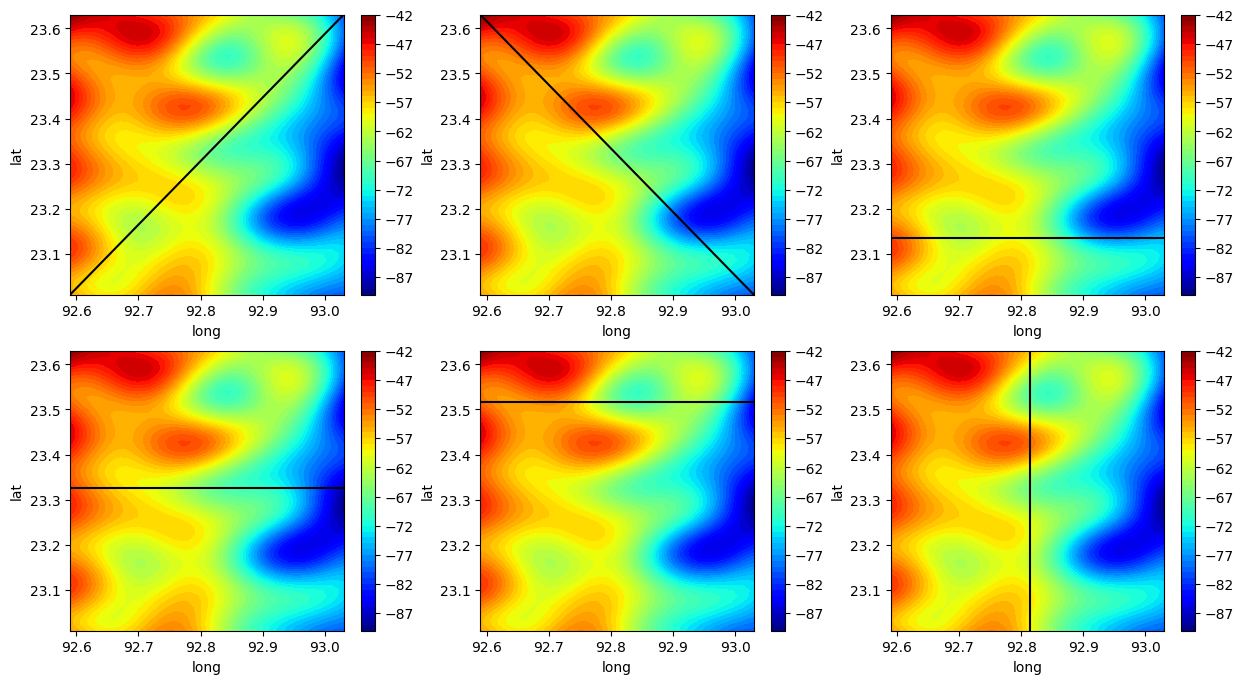

In [10]:
# Plot lines on grid map

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(swnex, swney, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.subplot(2,3,2)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(senwx, senwy, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.subplot(2,3,3)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(ew1x, ew1y, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.subplot(2,3,4)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(ew2x, ew2y, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.subplot(2,3,5)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(ew3x, ew3y, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.subplot(2,3,6)
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(nsx, nsy, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

plt.show()



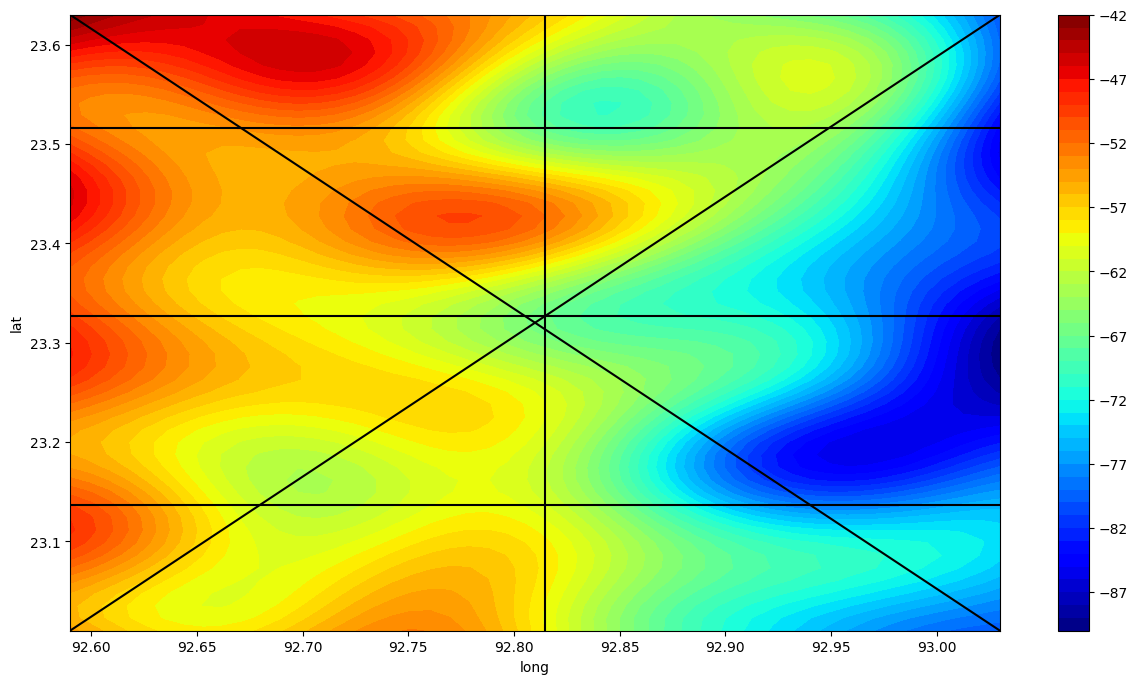

In [11]:
plt.figure(figsize=(15,8))
plt.contourf(xi, yi, cba, levels=50, cmap="jet")
plt.plot(senwx, senwy, color='black')
plt.plot(swnex, swney, color='black')
plt.plot(ew1x, ew1y, color='black')
plt.plot(ew2x, ew2y, color='black')
plt.plot(nsx, nsy, color='black')
plt.plot(ew3x, ew3y, color='black')
plt.xlabel("long"); plt.ylabel("lat")
plt.colorbar()

In [12]:
def dataframe(x,y,g):
 dta = pd.DataFrame({'Longitude': x, 'Latitude': y,'CBA': g})
 print(dta.head())
 return dta

In [13]:
SWNE= dataframe(swnex,swney,swneg)
SENW= dataframe(senwx,senwy,senwg)
EW1= dataframe(ew1x,ew1y,ew1g)
EW2= dataframe(ew2x,ew2y,ew2g)
EW3= dataframe(ew3x,ew3y,ew3g)
NS= dataframe(nsx,nsy,nsg)

   Longitude   Latitude        CBA
0  92.590000  23.010000 -54.609631
1  92.598980  23.022653 -56.394682
2  92.607959  23.035306 -57.276283
3  92.616939  23.047959 -57.428354
4  92.625918  23.060612 -57.180062
   Longitude   Latitude        CBA
0  92.590000  23.630000 -42.284879
1  92.598980  23.617347 -44.345046
2  92.607959  23.604694 -46.417942
3  92.616939  23.592041 -48.231997
4  92.625918  23.579388 -49.653218
   Longitude   Latitude        CBA
0  92.590000  23.136531 -49.908154
1  92.598980  23.136531 -50.633563
2  92.607959  23.136531 -51.587560
3  92.616939  23.136531 -52.740306
4  92.625918  23.136531 -54.046134
   Longitude   Latitude        CBA
0  92.590000  23.326327 -49.691500
1  92.598980  23.326327 -50.688974
2  92.607959  23.326327 -51.728212
3  92.616939  23.326327 -52.774495
4  92.625918  23.326327 -53.794160
   Longitude   Latitude        CBA
0  92.590000  23.516122 -51.804975
1  92.598980  23.516122 -52.640520
2  92.607959  23.516122 -53.345754
3  92.616939  23.516

In [16]:
def distance(x):
 from pyproj import Proj
 myProj = Proj("+proj=utm +zone=33 +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
 x['UTM_X'], x['UTM_Y'] = myProj(x.Longitude, x.Latitude)
 #distance
 UTM = np.array((x.UTM_X, x.UTM_Y))
 xd, yd = np.diff(x.UTM_X), np.diff(x.UTM_Y)
 d = np.sqrt(xd**2 + yd**2)
 d = np.cumsum(d)
 x['Distance'] = np.insert(d,0,0)
 print(x.head())
 return x

In [17]:
SWNE_df= distance(SWNE)
SENW_df= distance(SENW)
EW1_df= distance(EW1)
EW2_df= distance(EW2)
EW3_df= distance(EW3)
NS_df= distance(NS)

   Longitude   Latitude        CBA         UTM_X         UTM_Y      Distance
0  92.590000  23.010000 -54.609631  9.835554e+06  7.039159e+06      0.000000
1  92.598980  23.022653 -56.394682  9.833775e+06  7.042518e+06   3800.783872
2  92.607959  23.035306 -57.276283  9.831995e+06  7.045874e+06   7600.495246
3  92.616939  23.047959 -57.428354  9.830213e+06  7.049229e+06  11399.133746
4  92.625918  23.060612 -57.180062  9.828430e+06  7.052582e+06  15196.698992
   Longitude   Latitude        CBA         UTM_X         UTM_Y      Distance
0  92.590000  23.630000 -42.284879  9.700057e+06  7.112781e+06      0.000000
1  92.598980  23.617347 -44.345046  9.703769e+06  7.113103e+06   3725.738934
2  92.607959  23.604694 -46.417942  9.707483e+06  7.113425e+06   7453.501410
3  92.616939  23.592041 -48.231997  9.711199e+06  7.113748e+06  11183.289717
4  92.625918  23.579388 -49.653218  9.714916e+06  7.114072e+06  14915.106150
   Longitude   Latitude        CBA         UTM_X         UTM_Y     Distance


In [18]:
all_df = pd.concat((SWNE_df, SENW_df, EW1_df, EW2_df, EW3_df, NS_df)).reset_index(drop=True) 
print(all_df)

     Longitude   Latitude        CBA         UTM_X         UTM_Y  \
0    92.590000  23.010000 -54.609631  9.835554e+06  7.039159e+06   
1    92.598980  23.022653 -56.394682  9.833775e+06  7.042518e+06   
2    92.607959  23.035306 -57.276283  9.831995e+06  7.045874e+06   
3    92.616939  23.047959 -57.428354  9.830213e+06  7.049229e+06   
4    92.625918  23.060612 -57.180062  9.828430e+06  7.052582e+06   
..         ...        ...        ...           ...           ...   
295  92.814490  23.579388 -63.146270  9.735100e+06  7.152006e+06   
296  92.814490  23.592041 -61.062640  9.732330e+06  7.153467e+06   
297  92.814490  23.604694 -59.212307  9.729561e+06  7.154928e+06   
298  92.814490  23.617347 -57.741410  9.726793e+06  7.156387e+06   
299  92.814490  23.630000 -56.681190  9.724025e+06  7.157846e+06   

          Distance  
0         0.000000  
1      3800.783872  
2      7600.495246  
3     11399.133746  
4     15196.698992  
..             ...  
295  142200.285080  
296  145332.126

In [19]:
# Plot CBA over Distance
def distvscba(a,b,c,d,e,f):
 plt.figure(figsize=(15,6))
 plt.subplot(2,3,1)
 plt.plot(a.Distance, a.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")
  
 plt.subplot(2,3,2)
 plt.plot(b.Distance, b.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")
    
    
 plt.subplot(2,3,3)
 plt.plot(c.Distance, c.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")
  
 plt.subplot(2,3,4)
 plt.plot(d.Distance, d.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")

 plt.subplot(2,3,5)
 plt.plot(e.Distance, e.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")
    
 plt.subplot(2,3,6)
 plt.plot(f.Distance, f.CBA, color='black')
 plt.xlabel("Distance [m]"); plt.ylabel("CBA [mgal]")

 plt.show()

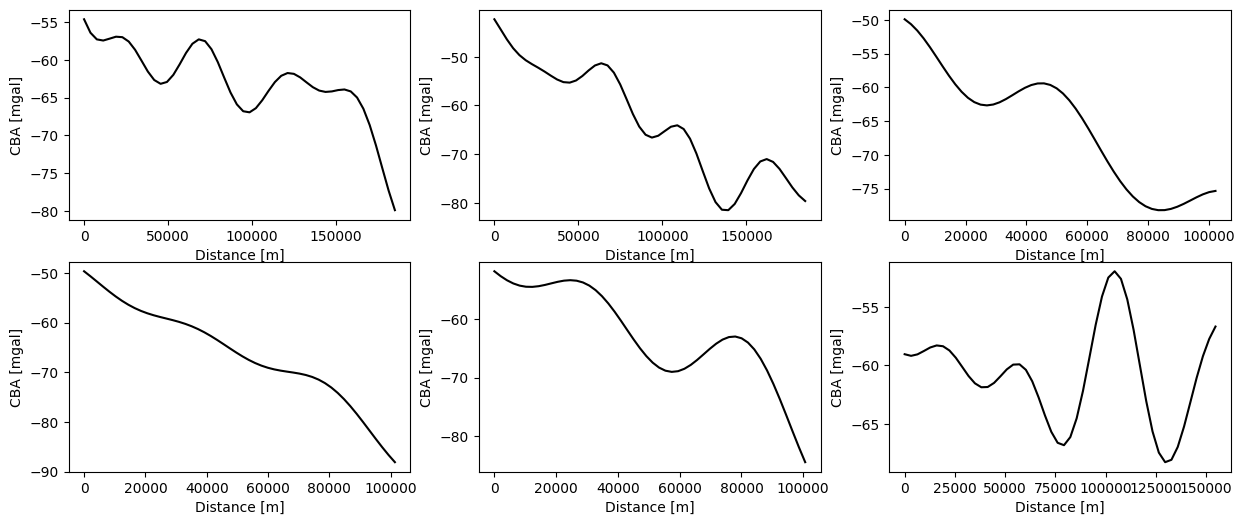

In [20]:
distvscba(SWNE,SENW,EW1,EW2,EW3,NS)

In [21]:
def fft(lol):
 from scipy.fft import fft, ifft
 tmp = np.asarray(lol.CBA, dtype=float)
 A = fft(tmp)
 #print(A)
#imaginary = A.imag
#real = A.real
#absol = np.sqrt((imaginary**2) + (real**2))
 A = np.abs(A)**2
 lnA = np.log(A)


#plt.plot(A,lnA)

#calculate k
 distdiff = lol['Distance'][len(lol)-1]-lol['Distance'][0]
 distdiffkm = distdiff/1000
 f = []
 fsample=0
 for i in range(len(lol)):
   fsample = fsample + 1/distdiffkm
   f.append(fsample)
 f = np.array(f) 
 k = 2*np.pi*f

 return k,lnA

In [22]:
SWNE_fft = fft(SWNE_df)
SENW_fft = fft(SENW_df)
EW1_fft = fft(EW1_df)
EW2_fft = fft(EW2_df)
EW3_fft = fft(EW3_df)
NS_fft = fft(NS_df)
all_fft = fft(all_df)

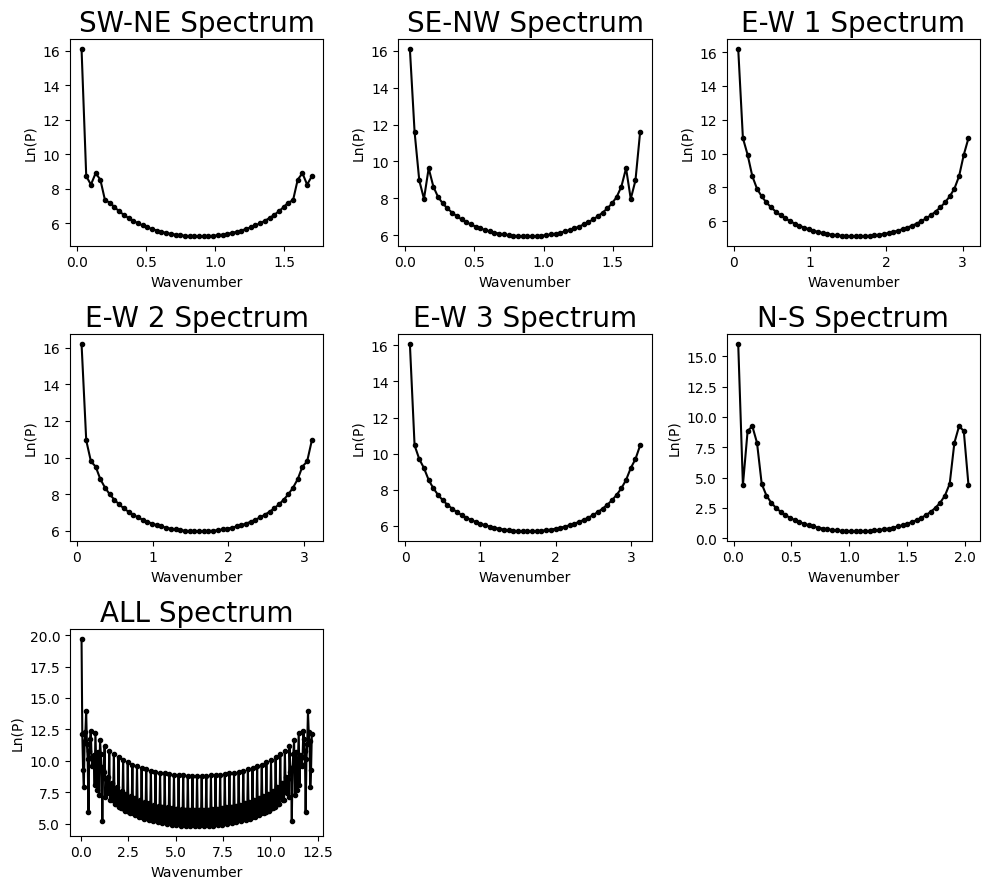

In [23]:
ffts = [SWNE_fft, SENW_fft, EW1_fft, EW2_fft, EW3_fft,NS_fft,all_fft]
fft_title = ['SW-NE', 'SE-NW', 'E-W 1', 'E-W 2', 'E-W 3','N-S' ,'ALL']

plt.figure(figsize=(10,9))
for i in range(len(ffts)):
  plt.subplot(3,3,i+1)
  plt.plot(ffts[i][0], ffts[i][1], '.-', color='black')
  plt.xlabel("Wavenumber"); plt.ylabel("Ln(P)")
  plt.title("{} Spectrum".format(fft_title[i]), size=20)
plt.tight_layout()
plt.show()


In [24]:
print(SWNE_fft[0])

[0.03396856 0.06793713 0.10190569 0.13587426 0.16984282 0.20381138
 0.23777995 0.27174851 0.30571708 0.33968564 0.3736542  0.40762277
 0.44159133 0.4755599  0.50952846 0.54349702 0.57746559 0.61143415
 0.64540272 0.67937128 0.71333984 0.74730841 0.78127697 0.81524554
 0.8492141  0.88318267 0.91715123 0.95111979 0.98508836 1.01905692
 1.05302549 1.08699405 1.12096261 1.15493118 1.18889974 1.22286831
 1.25683687 1.29080543 1.324774   1.35874256 1.39271113 1.42667969
 1.46064825 1.49461682 1.52858538 1.56255395 1.59652251 1.63049107
 1.66445964 1.6984282 ]


In [25]:
def sa(slice_df,k,lnA,reg_cut,res_cut):
# Regional cutoff 
 k_reg_cut = k[0:reg_cut] 
 lnA_reg_cut = lnA[0:reg_cut]
#print(k_reg_cut)
# Residual cutoff
 k_res_cut = k[reg_cut:res_cut] 
 lnA_res_cut = lnA[reg_cut:res_cut]
#noise cutoff
 k_noise = k[res_cut:len(k)]
 lnA_noise = lnA[res_cut:len(k)]
 from scipy import stats
#slope,intercept,rvalue,stderror=stats.linregress(x,y)
 a_reg, b_reg, _, _,_ = stats.linregress(k_reg_cut, lnA_reg_cut)
 a_res, b_res,_, _,_ = stats.linregress(k_res_cut, lnA_res_cut)
 a_noise, b_noise,_, _,_ = stats.linregress(k_noise, lnA_noise)
#y= mx+c
 lnA_reg_fit = a_reg*k_reg_cut + b_reg
 lnA_res_fit = a_res*k_res_cut + b_res
 lnA_noise_fit = a_noise*k_noise + b_noise

# Calculate cutoff frequency
 freq_cut = (b_res - b_reg) / (a_reg - a_res)
# Calculate window
 dist = slice_df.Distance
 window = 2*np.pi/(((dist[3]-dist[2])/1000)*freq_cut) 
 window = int(window)
    
 plt.figure(figsize=(7,5))
 plt.scatter(k_reg_cut, lnA_reg_cut, color='b') 
 plt.plot(k_reg_cut, lnA_reg_fit,'--',  color='blue', label='Regional')
 plt.scatter(k_res_cut, lnA_res_cut, color='r') 
 plt.plot(k_res_cut, lnA_res_fit,'--', color='red', label='Residual')
 plt.scatter(k_noise, lnA_noise, color='y') 
 plt.plot(k_noise, lnA_noise_fit,'--', color='yellow', label='noise')
 plt.legend()
 plt.xlabel('Wavenumber (k)')
 plt.ylabel('ln(P)')
 plt.show()

 print(freq_cut,window)
 print(a_reg,a_res)

 return freq_cut,window,lnA_reg_fit,lnA_res_fit, a_reg, a_res, lnA_reg_cut,lnA_res_cut,k_reg_cut,k_res_cut,k_noise, lnA_noise_fit,lnA_noise

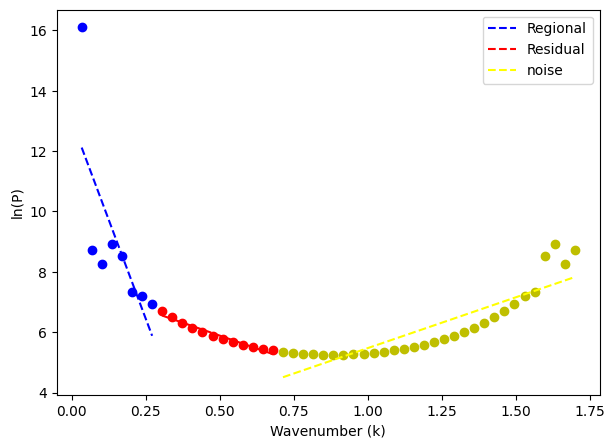

0.23726229246862626 6
-26.23352858650888 -3.422369106877735


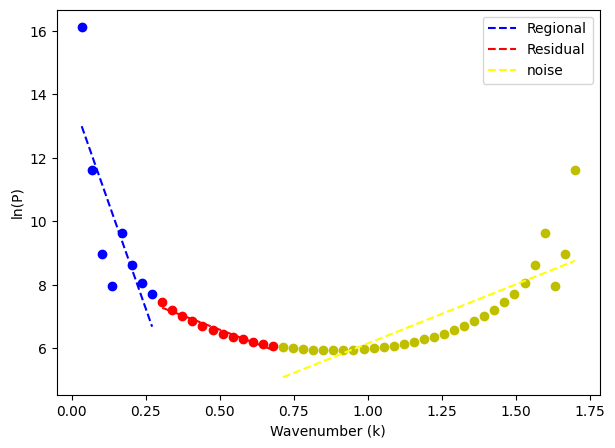

0.2405330097987309 7
-26.57710022421235 -3.5562088077441065


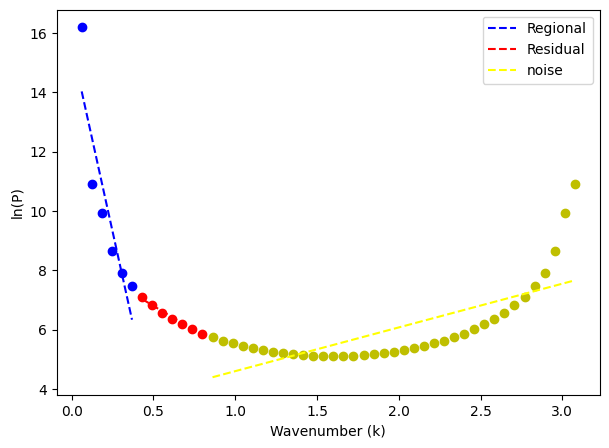

0.3275681385644627 9
-25.028603075608938 -3.337689679332212


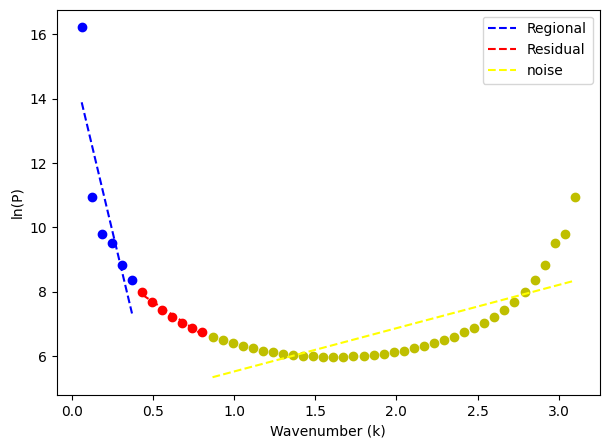

0.3272979769507089 9
-21.166985220953084 -3.3509191017823183


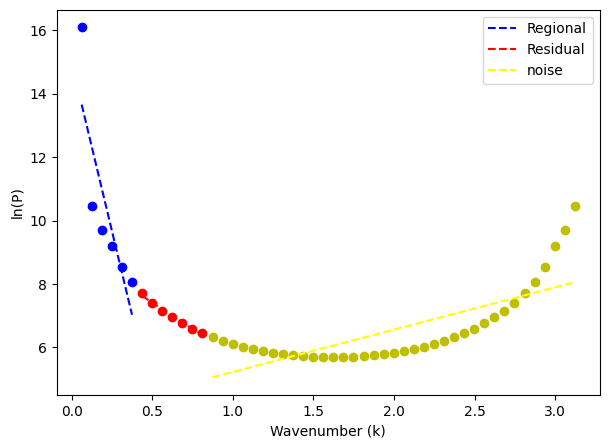

0.3296411154454183 9
-21.226112055302075 -3.3299841624839237


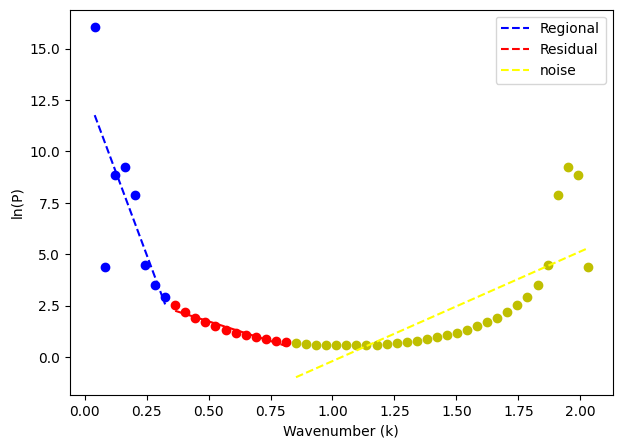

0.33037776375080485 5
-32.367704652325514 -3.8218194493273683


In [26]:
SWNE_cutoff, SWNE_window, SWNE_lnAregfit, SWNE_lnAresfit, SWNE_regm, SWNE_resm,SWNE_reg_cut,SWNE_res_cut, SWNE_kregcut, SWNE_krescut, SWNE_knoise, SWNE_lnAnoisef,SWNE_lnAnoise  = sa(SWNE_df, SWNE_fft[0], SWNE_fft[1], reg_cut=8, res_cut=20)
SENW_cutoff, SENW_window, SENW_lnAregfit, SENW_lnAresfit, SENW_regm, SENW_resm,SENW_reg_cut,SENW_res_cut, SENW_kregcut, SENW_krescut, SENW_knoise,SENW_lnAnoisef,SENW_lnAnoise = sa(SENW_df, SENW_fft[0], SENW_fft[1], reg_cut=8, res_cut=20)
EW1_cutoff, EW1_window, EW1_lnAregfit, EW1_lnAresfit, EW1_regm, EW1_resm,EW1_reg_cut,EW1_res_cut, EW1_kregcut, EW1_krescut, EW1_Knoise, EW1_lnAnoisef,EW1_lnAnoise = sa(EW1_df, EW1_fft[0], EW1_fft[1], reg_cut=6, res_cut=13)
EW2_cutoff, EW2_window, EW2_lnAregfit, EW2_lnAresfit, EW2_regm, EW2_resm,EW2_reg_cut,EW2_res_cut, EW2_kregcut, EW2_krescut, EW2_knoise, EW2_lnAnoisef, EW2_lnAnoise= sa(EW2_df, EW2_fft[0], EW2_fft[1], reg_cut=6, res_cut=13)
EW3_cutoff, EW3_window, EW3_lnAregfit, EW3_lnAresfit, EW3_regm, EW3_resm,EW3_reg_cut,EW3_res_cut, EW3_kregcut, EW3_krescut, EW3_knoise, EW3_lnAnoisef,EW3_lnAnoise = sa(EW3_df, EW3_fft[0], EW3_fft[1], reg_cut=6, res_cut=13)
NS_cutoff, NS_window, NS_lnAregfit, NS_lnAresfit, NS_regm, NS_resm,NS_reg_cut,NS_res_cut, NS_kregcut, NS_krescut, NS_knoise, NS_lnAnoisef,NS_lnAnoise = sa(NS_df, NS_fft[0], NS_fft[1], reg_cut=8, res_cut=20)

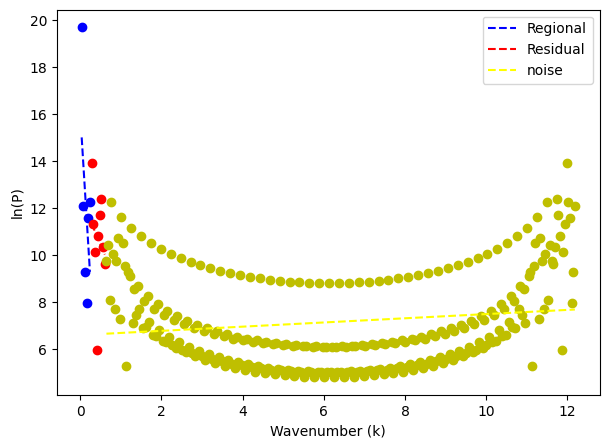

0.1514233405486629 10
-28.21926420177093 -4.070405840750806


In [27]:
all_cutoff, all_window, all_lnAregfit, all_lnAresfit, all_regm, all_resm,all_reg_cut,all_res_cut, all_kregcut, all_krescut, all_knoise, all_lnAnoisef,all_lnAnoise=sa(all_df, all_fft[0],all_fft[1],reg_cut=6,res_cut=15)

In [28]:
def depth(a_reg,a_res):
 depth_reg = -1*a_reg/2
 depth_res = -1*a_res/2
 print(depth_reg,depth_res)
 return depth_reg,depth_res

In [29]:
d_regSWNE,d_resSWNE = depth(SWNE_regm, SWNE_resm)
d_regSENW,d_resSENW = depth(SENW_regm, SENW_resm)
d_regEW1,d_resEW1 = depth(EW1_regm, EW1_resm)
d_regEW2,d_resEW2 = depth(EW2_regm, EW2_resm)
d_regEW3,d_resEW3 = depth(EW3_regm, EW3_resm)
d_regNS,d_resNS = depth(NS_regm, NS_resm)

13.11676429325444 1.7111845534388674
13.288550112106176 1.7781044038720533
12.514301537804469 1.668844839666106
10.583492610476542 1.6754595508911592
10.613056027651037 1.6649920812419619
16.183852326162757 1.9109097246636841


In [30]:
d_reg=[d_regSWNE,d_regSENW,d_regEW1,d_regEW2,d_regEW3,d_regNS]
d_res=[d_resSWNE,d_resSENW,d_resEW1,d_resEW2,d_resEW3,d_resNS]

In [31]:
def avg(x):
    g = sum(x)
    avg = g/len(x)
    print(avg)
    return avg

In [32]:
avgreg= avg(d_reg)
avgres= avg(d_res)

12.716669484575903
1.734915858962305


In [33]:
d_reg=[d_regSWNE,d_regSENW,d_regEW1,d_regEW2,d_regEW3,d_regNS,avgreg]
d_res=[d_resSWNE,d_resSENW,d_resEW1,d_resEW2,d_resEW3,d_resNS,avgres]

In [34]:
depth_data = pd.DataFrame({'regional':d_reg, 'residual': d_res})
depth_data.index = ['SWNE','SENW','EW1','EW2','EW3','NS','avg']
print(depth_data)

       regional  residual
SWNE  13.116764  1.711185
SENW  13.288550  1.778104
EW1   12.514302  1.668845
EW2   10.583493  1.675460
EW3   10.613056  1.664992
NS    16.183852  1.910910
avg   12.716669  1.734916


In [36]:
depth_data.to_csv('depth.csv') 

In [37]:
def separateAnomaly(slice_df, window):
  reg = slice_df.CBA.rolling(window).mean()
  res = slice_df.CBA - reg
  slice_df["Regional"] = reg.values
  slice_df["Residual"] = res.values
  return slice_df

In [38]:
SWNE_result = separateAnomaly(SWNE_df, SWNE_window)
SENW_result = separateAnomaly(SENW_df, SENW_window)
EW1_result = separateAnomaly(EW1_df, EW1_window)
EW2_result = separateAnomaly(EW2_df, EW2_window)
EW3_result = separateAnomaly(EW3_df, EW3_window)
all_result = separateAnomaly(all_df, all_window)

In [39]:
# Concatenate all dataframes of slices
results = pd.concat((SWNE_result, SENW_result, EW1_result,
                     EW2_result, EW3_result)).reset_index(drop=True)

In [42]:
print(results.head())

   Longitude   Latitude        CBA         UTM_X         UTM_Y      Distance  \
0  92.590000  23.010000 -54.609631  9.835554e+06  7.039159e+06      0.000000   
1  92.598980  23.022653 -56.394682  9.833775e+06  7.042518e+06   3800.783872   
2  92.607959  23.035306 -57.276283  9.831995e+06  7.045874e+06   7600.495246   
3  92.616939  23.047959 -57.428354  9.830213e+06  7.049229e+06  11399.133746   
4  92.625918  23.060612 -57.180062  9.828430e+06  7.052582e+06  15196.698992   

   Regional  Residual  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  


In [43]:
print("Original size of data:", len(results), "rows")
print("How many data with NaN values?")
print(results.isnull().sum())

Original size of data: 250 rows
How many data with NaN values?
Longitude     0
Latitude      0
CBA           0
UTM_X         0
UTM_Y         0
Distance      0
Regional     35
Residual     35
dtype: int64


In [44]:
# drop rows with missing values
results.dropna(inplace=True)
# re-index dataframe
results = results.reset_index(drop=True)
print("NaN has successfully been deleted")
results.head(10)

NaN has successfully been deleted


,Longitude,Latitude,CBA,UTM_X,UTM_Y,Distance,Regional,Residual
0,92.634898,23.073265,-56.919720,9.826645e+06,7.055933e+06,18993.190611,-56.634789,-0.284932
1,92.643878,23.085918,-56.983380,9.824859e+06,7.059282e+06,22788.608228,-57.030414,0.047033
2,92.652857,23.098571,-57.563358,9.823072e+06,7.062629e+06,26582.951473,-57.225193,-0.338165
3,92.661837,23.111224,-58.660916,9.821283e+06,7.065974e+06,30376.219977,-57.455965,-1.204951
4,92.670816,23.123878,-60.091499,9.819493e+06,7.069317e+06,34168.413372,-57.899823,-2.191676
5,92.679796,23.136531,-61.541633,9.817701e+06,7.072658e+06,37959.531293,-58.626751,-2.914882
6,92.688776,23.149184,-62.661907,9.815908e+06,7.075997e+06,41749.573378,-59.583782,-3.078125
7,92.697755,23.161837,-63.167742,9.814113e+06,7.079334e+06,45538.539265,-60.614509,-2.553233
8,92.706735,23.174490,-62.922646,9.812318e+06,7.082669e+06,49326.428594,-61.507724,-1.414922
9,92.715714,23.187143,-61.980389,9.810521e+06,7.086002e+06,53113.241010,-62.060969,0.080580


In [46]:
results.to_csv('results.csv') 

In [47]:
# Gridding x and y
xi = np.linspace(min(x), max(x), 1000)
yi = np.linspace(min(y), max(y), 1000)
xi, yi = np.meshgrid(xi, yi)

x, y = results["Longitude"].values, results["Latitude"].values
CBA, reg, res = results.CBA.values, results.Regional.values, results.Residual.values

zi_CBA = griddata((x,y),CBA,(xi,yi))
zi_reg = griddata((x,y),reg,(xi,yi))
zi_res = griddata((x,y),res,(xi,yi))

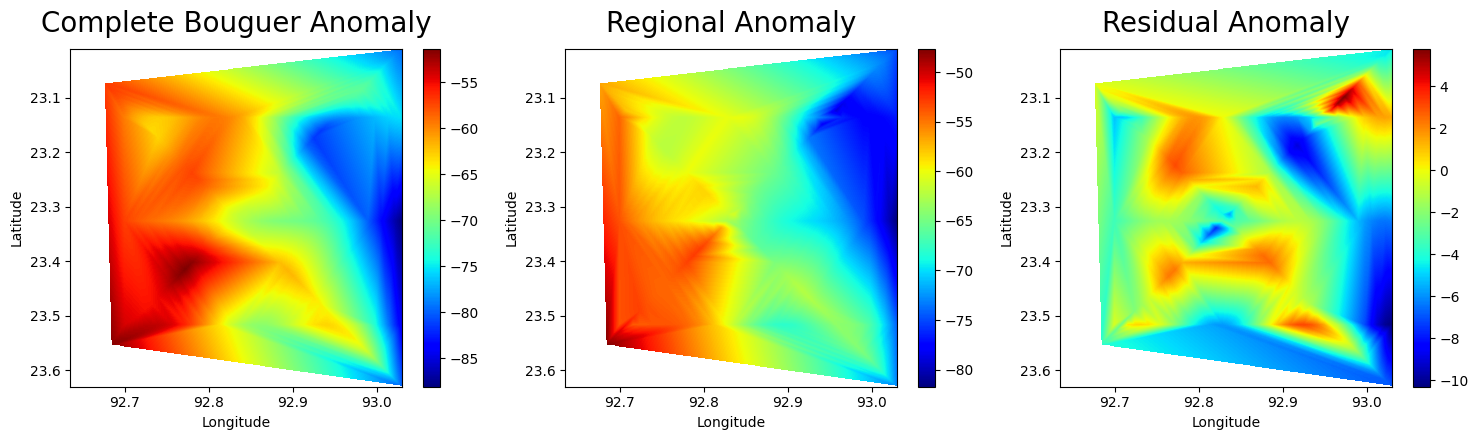

In [48]:
# Min max coordinates
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)

# Grid map
plt.figure(figsize=(15,4.5))

plt.subplot(1,3,1)
plt.imshow(zi_CBA, aspect='auto', extent=(xmin,xmax,ymax,ymin), cmap='jet')
plt.title('Complete Bouguer Anomaly', size=20, pad=12)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(zi_reg, aspect='auto', extent=(xmin,xmax,ymax,ymin), cmap='jet')
plt.title('Regional Anomaly', size=20, pad=12)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(zi_res, aspect='auto', extent=(xmin,xmax,ymax,ymin), cmap='jet')
plt.title('Residual Anomaly', size=20, pad=12)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.colorbar()

plt.tight_layout()
plt.show()
     